Notebook getting distance dependence model MICrONS data set.  This model is run in a subsample, just to check the parameters used for the model building. The full model is run in the the directory code

In [1]:
import pandas as pd
import numpy as np
import conntility
from connalysis import modelling
from helpers import read_connectomes
import matplotlib.pyplot as plt 

In [2]:
#exc_types=['23P', '4P', '5P_IT', '5P_NP', '5P_PT', '6CT', '6IT', 'BPC']
# Load data and restrict to EXC neurons
data_dir="data" # You chosen data directory 
conn=read_connectomes.load_microns(data_dir)#.index("cell_type").isin(exc_types)

# Getting started 

#### We first check out the coordinate distance values to choose modelling paramaters such as maximum distance considered and number of bins.  These will affect the parameter outputs. 

Text(0.5, 1.0, 'Pairwise distances')

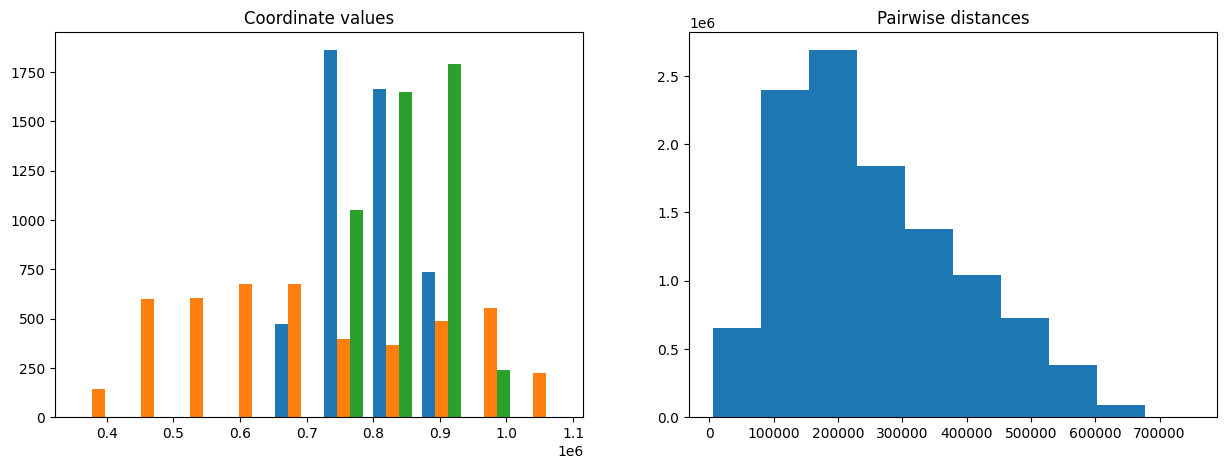

In [3]:
from scipy.spatial import distance
dists=distance.pdist(conn.vertices[['x_nm', 'y_nm', 'z_nm']])
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(conn.vertices[['x_nm', 'y_nm', 'z_nm']])
axs[0].set_title("Coordinate values")
axs[1].hist(dists)
axs[1].set_title("Pairwise distances")

# Building model 

#### From the figures above we set the bin_size to be 3500 to get approximately 20 bins in our model

In [4]:
# Configure model building
config_dict = {'model_name': 'ConnProb2ndOrder',  # Name of the model (to be used in file names, ...)
               'model_order': 2,                  # Model order
               'coord_names': ['x_nm', 'y_nm', 'z_nm'], # name of coordinates in nrn_info data frame
               'bin_size_um': 5000,#3500                # Bin size (um) for depth binning
               'max_range_um': None,              # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': len(conn.vertices)//2,               # Size of random subset of neurons to consider (0 or None to disable subsampling)
               'sample_seed': 4321,               # Seed for selecting random subset of neurons
               'model_dir': '../data/models_MICrONS', # Output directory where to save the model (None to disable saving)
               'data_dir': '../data/models_MICrONS',    # Output directory where to save the extracted data (None to disable saving)
               'do_plot': True,                   # Enable/disable output plotting
               'plot_dir': '../figs',    # Output directory where to save the plots (None to disable saving)
               'N_split': None,                   # Number of data splits to sequentially run computations on, reducing memory consumption (None to disable splitting)
               'part_idx': None}     

#### Estimate the model parameters and check that the model obtained makes sense.  Figures for visual checking are directly provided.

 2024-05-29 17:15:24,162: Running order-2 model building {'coord_names': ['x_nm', 'y_nm', 'z_nm'], 'bin_size_um': 5000, 'max_range_um': None, 'sample_size': 2366, 'sample_seed': 4321, 'model_dir': '../data/models_MICrONS', 'data_dir': '../data/models_MICrONS', 'do_plot': True, 'plot_dir': '../figs', 'N_split': None, 'part_idx': None}...
 2024-05-29 17:15:24,163: Subsampling to 2366 of 4732 neurons (seed=4321)
 2024-05-29 17:15:24,216: Extracting 1-dimensional (149) connection probabilities...
100% |#########################################################################|
/gpfs/bbp.cscs.ch/home/egassant/conndemo/lib/python3.10/site-packages/connalysis/modelling/modelling.py:1014: RuntimeWarning: invalid value encountered in divide
  p_conn = np.array(count_conn / count_all)
 2024-05-29 17:15:28,317: Pickled dict written to ../data/models_MICrONS/ConnProb2ndOrder__data.pickle
 2024-05-29 17:15:28,319: MODEL FIT: f(x) = 0.142934 * exp(-0.000013 * x)
 2024-05-29 17:15:28,320: Pickled dict

({'p_conn_dist': array([           nan, 2.10084034e-01, 1.11630322e-01, 8.64133264e-02,
         8.34380893e-02, 7.75316456e-02, 7.79725484e-02, 7.41715900e-02,
         7.39710790e-02, 7.17246740e-02, 6.62546085e-02, 6.32109697e-02,
         6.09089916e-02, 5.90445001e-02, 5.70954393e-02, 5.27901964e-02,
         5.14058141e-02, 4.79245666e-02, 4.50682139e-02, 4.29788371e-02,
         4.02914522e-02, 3.79966143e-02, 3.40200941e-02, 3.24176885e-02,
         3.05774961e-02, 2.75710266e-02, 2.46387347e-02, 2.37638488e-02,
         2.25016753e-02, 2.17738424e-02, 1.85355111e-02, 1.78354400e-02,
         1.69025711e-02, 1.52879686e-02, 1.44122156e-02, 1.32801444e-02,
         1.32119728e-02, 1.25675114e-02, 1.16356526e-02, 1.00479536e-02,
         1.02370812e-02, 1.01527593e-02, 9.62197630e-03, 1.00625441e-02,
         8.97065333e-03, 8.28721933e-03, 8.10127973e-03, 7.52884886e-03,
         7.99449841e-03, 7.51902045e-03, 7.65376694e-03, 7.17784418e-03,
         6.40243902e-03, 6.39690084e

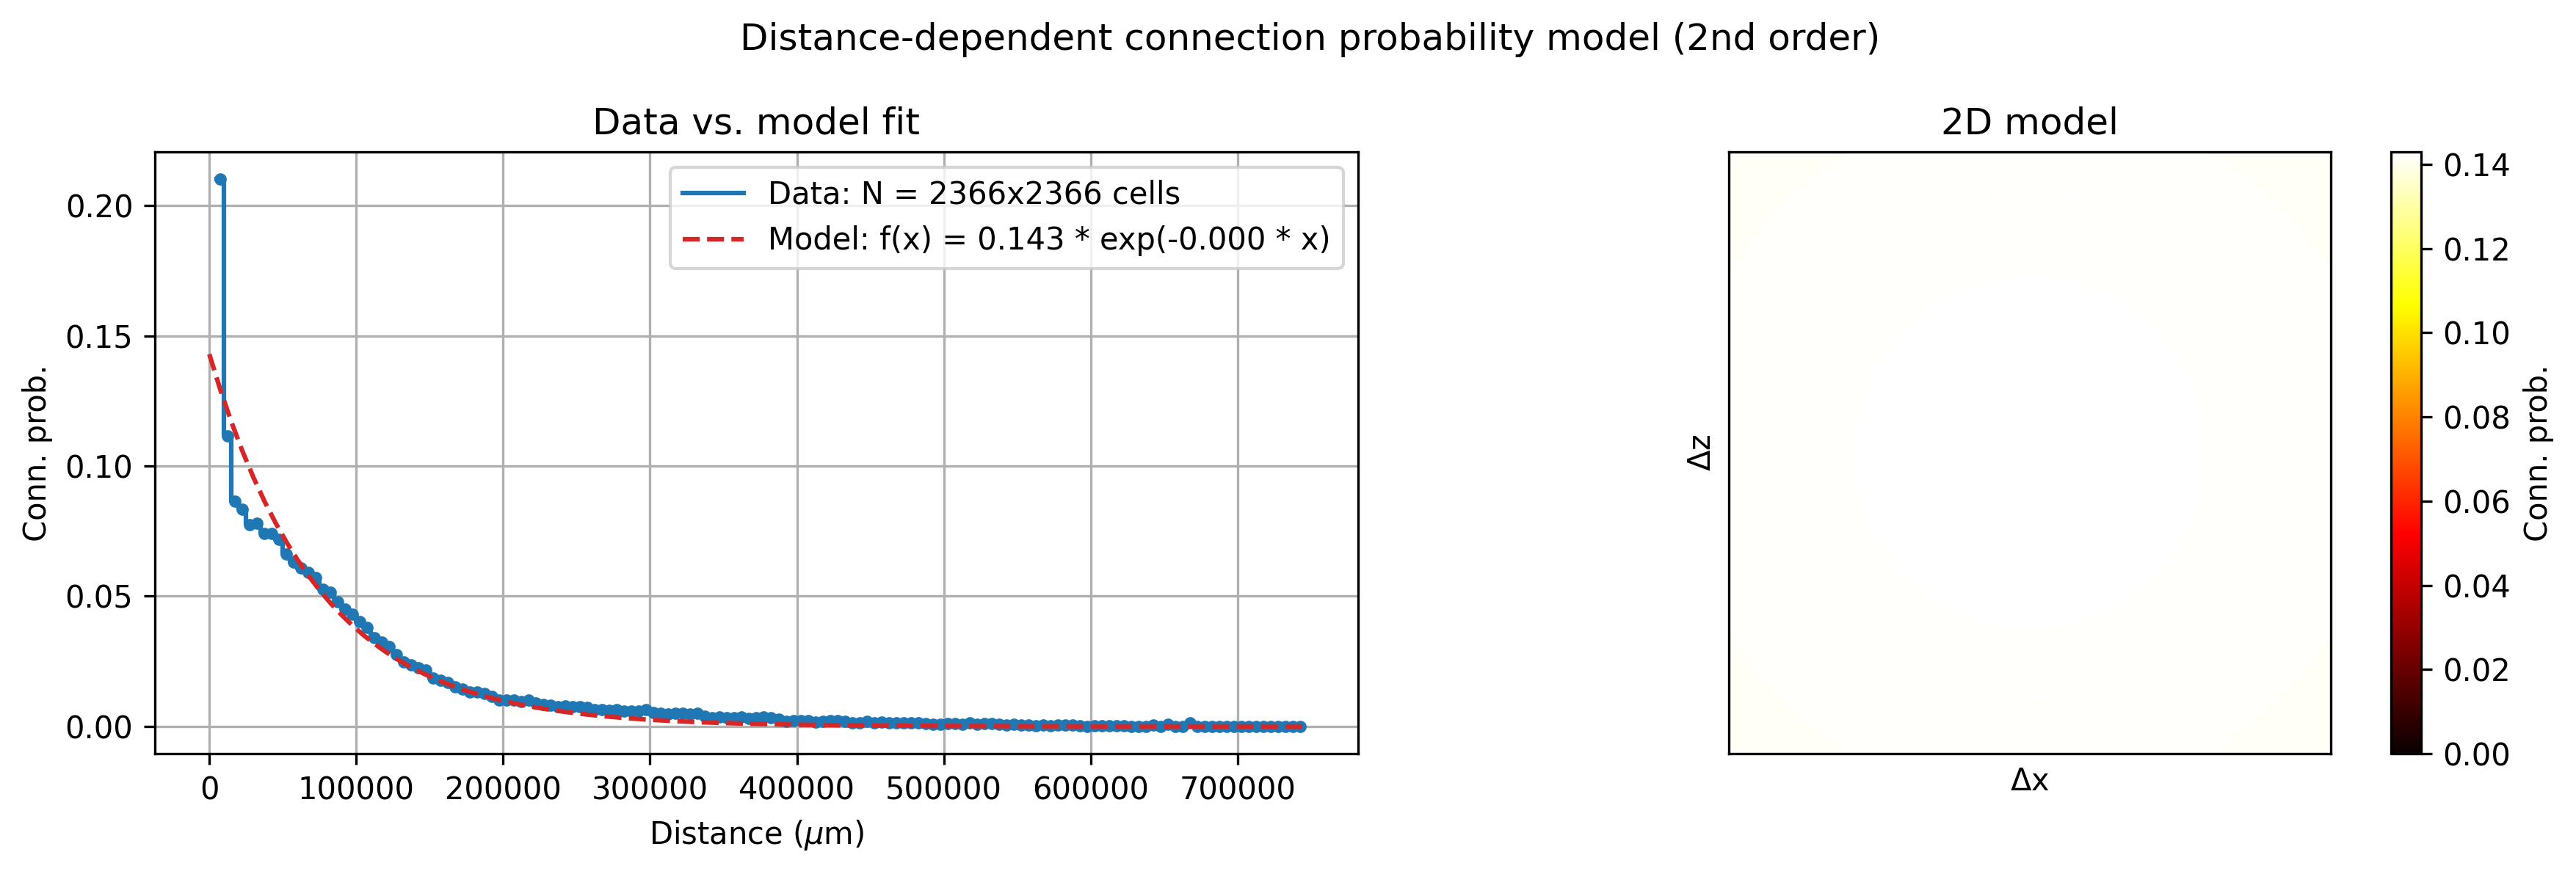

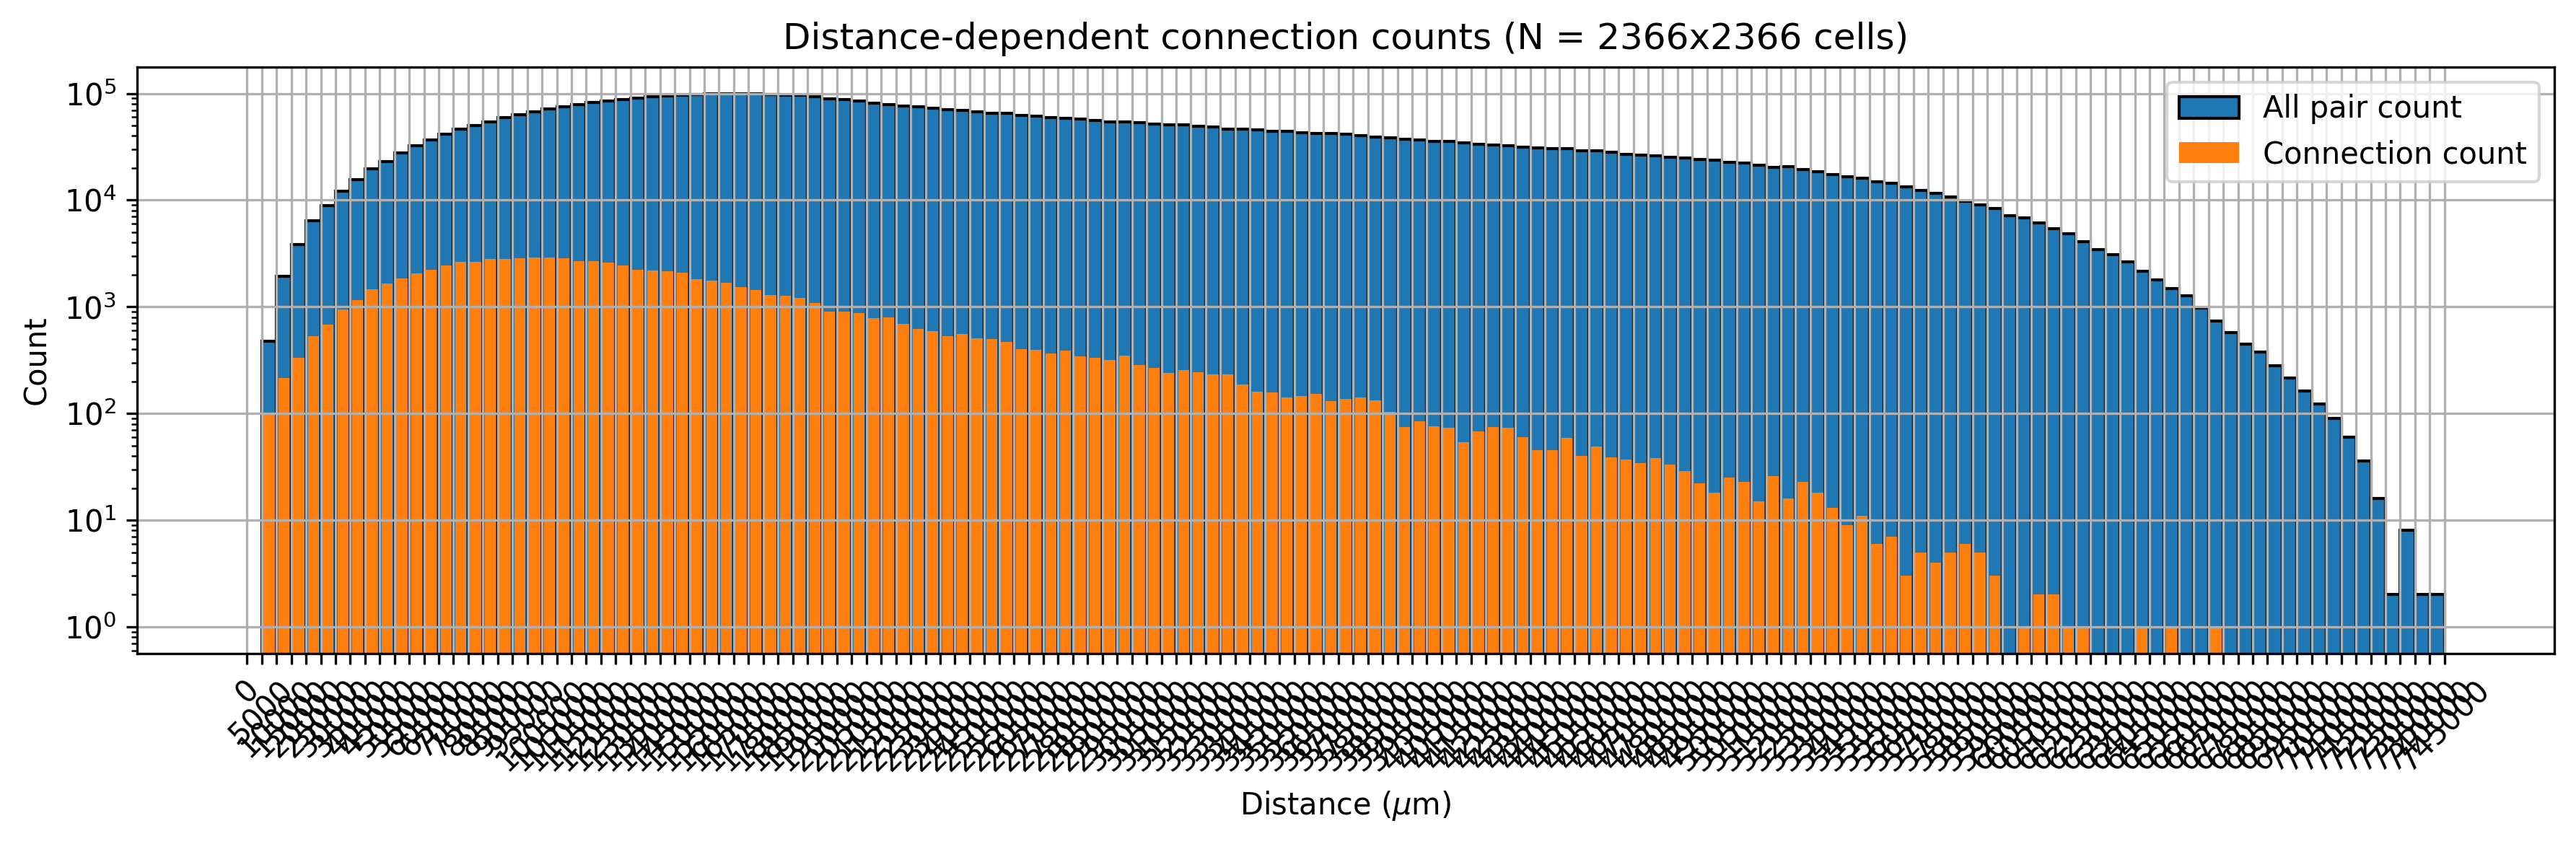

In [5]:
modelling.run_model_building(conn.matrix.astype(bool), conn.vertices, **config_dict)